###  print out structures

In [1]:
import random
import numpy as np
import pprint
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)


#### Neuron

number of inputs:  1
Neuron:  LinearNeuron(1)
weights:  [Value(name=val1,layernumber=L,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0)]
b:  Value(name=val2,layernumber=L,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)
b type:  b
number of parameters  2
parameters
[   Value(name=val1,layernumber=L,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=val2,layernumber=L,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val3,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
number of Value objects created =  5
activation:  Value(name=val5,layernumber=L,neuronnumber=n,weightnumber=,type=a,data=0.5, grad=0)
backward mul before  val1 0 val4 1
backward mul after val1 1
backward mul after val3 0.5


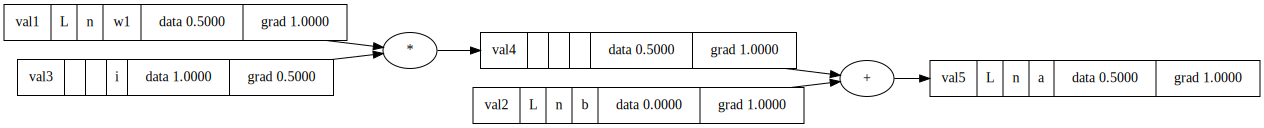

In [2]:
nin=1  #number of inputs
nonlin=False
Value.value_counter=0

myNeuron=Neuron(nin,nonlin=nonlin, weightsinit=2)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b type: ",myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print("parameters")
pp.pprint(myNeuron.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation=myNeuron(xinput)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
activation.backward()
draw_dot(activation)

## Gradient

activation1  Value(name=val17,layernumber=L,neuronnumber=n1,weightnumber=,type=a,data=1.4000000000000001, grad=0)
activation2  Value(name=val26,layernumber=L,neuronnumber=n2,weightnumber=,type=a,data=19.0, grad=0)
number of Value objects created =  39
loss= Value(name=val39,layernumber=,neuronnumber=,weightnumber=,type=,data=26.6, grad=0)
backward mul before  val32 0 val39 1
backward mul after val32 19.0
backward mul after val38 1.4000000000000001
backward mul before  val1 0 val27 19.0
backward mul after val1 19.0
backward mul after val9 1.9000000000000001
backward mul before  val2 0 val29 19.0
backward mul after val2 38.0
backward mul after val10 3.8000000000000003
backward mul before  val3 0 val31 19.0
backward mul after val3 57.0
backward mul after val11 5.700000000000001
backward mul before  val7 0 val37 1.4000000000000001
backward mul after val7 9.8
backward mul after val20 2.1000000000000005
backward mul before  val6 0 val35 1.4000000000000001
backward mul after val6 8.4
backward

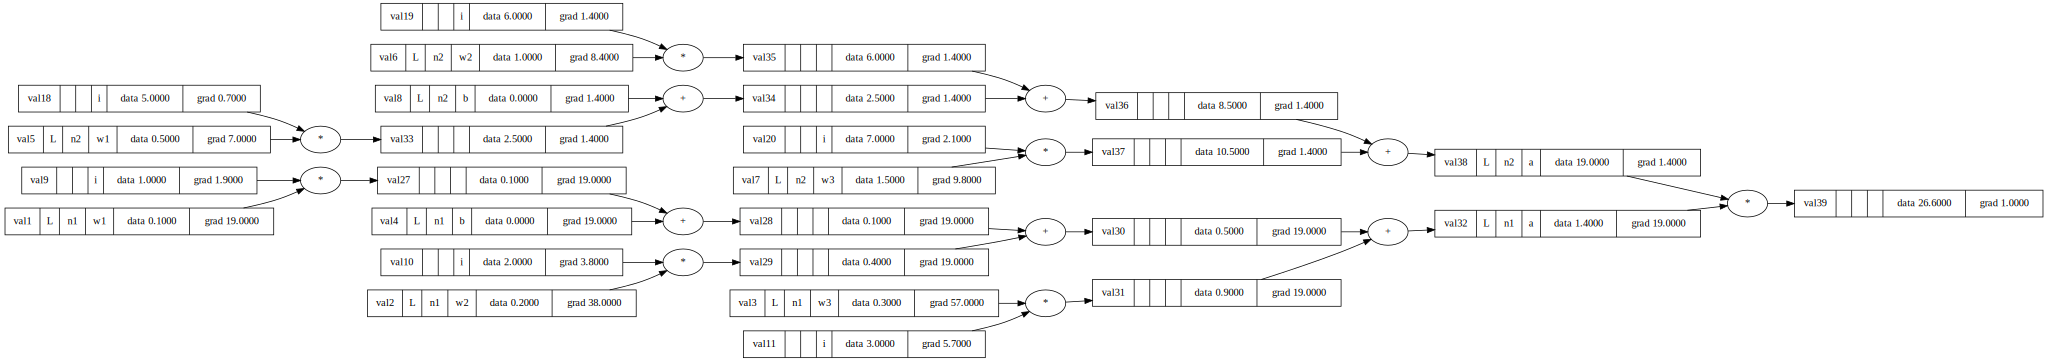

In [3]:
nin = 3  # number of inputs
Value.value_counter = 0
nonlin = False
print_params=False
print_inputs=False

myNeuron1 = Neuron(nin, neuronnumber="n1", nonlin=nonlin, weightsinit=1)
myNeuron2 = Neuron(nin, neuronnumber="n2", nonlin=nonlin, weightsinit=2)
if print_params:
    pp.pprint(myNeuron1.parameters())
    pp.pprint(myNeuron2.parameters())

xinumbers1 = list(range(1, nin + 1))
xinput1 = [Value(x, type="i") for x in xinumbers1]
if print_inputs:
    print("inputs1")
    pp.pprint(xinput1)

activation1 = myNeuron1(xinput1)
print("activation1 ", activation1)

xinumbers2 = list(range(5, 5+nin ))
xinput2 = [Value(x, type="i") for x in xinumbers2]
if print_inputs:
    print("inputs2")
    pp.pprint(xinput2)

activation2 = myNeuron2(xinput2)
print("activation2 ", activation2)

loss = myNeuron1(xinput1) * myNeuron2(xinput2)
print("number of Value objects created = ", Value.value_counter)

print("loss=", loss)

loss.backward()

draw_dot(loss)